In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [169]:
df = pd.read_csv('hotel_reservations.csv')

df.head()

,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [170]:
df.shape

(36275, 19)

In [171]:
df = df.drop(['booking_id', 'arrival_year', 'arrival_month', 'arrival_date'], axis=1)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50,0,Canceled


In [172]:
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [173]:
df.booking_status.value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

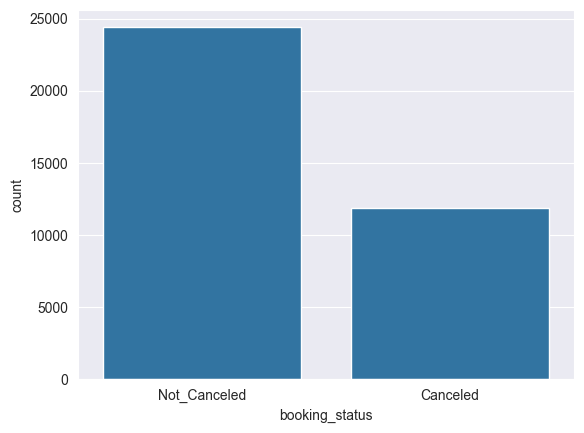

In [174]:
sns.countplot(x='booking_status', data=df)
plt.show()

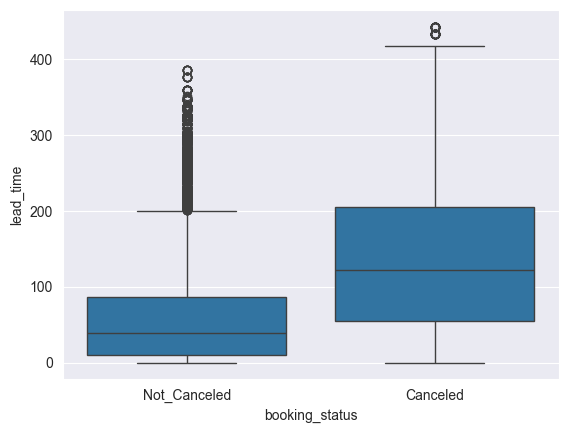

In [175]:
sns.boxplot(x='booking_status', y='lead_time', data=df)
plt.show()

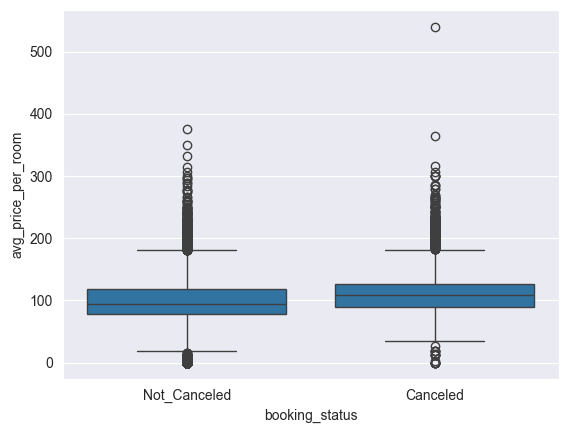

In [176]:
sns.boxplot(x='booking_status', y='avg_price_per_room', data=df)
plt.show()

In [177]:
df = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], drop_first=True)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,0,0,0,65.00,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5,0,0,0,106.68,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,0,0,0,60.00,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,0,0,0,100.00,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,0,0,0,94.50,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,0,0,0,167.80,...,False,False,True,False,False,False,False,False,False,True
36271,2,0,1,3,0,228,0,0,0,90.95,...,False,False,False,False,False,False,False,False,False,True
36272,2,0,2,6,0,148,0,0,0,98.39,...,False,False,False,False,False,False,False,False,False,True
36273,2,0,0,3,0,63,0,0,0,94.50,...,False,False,False,False,False,False,False,False,False,True


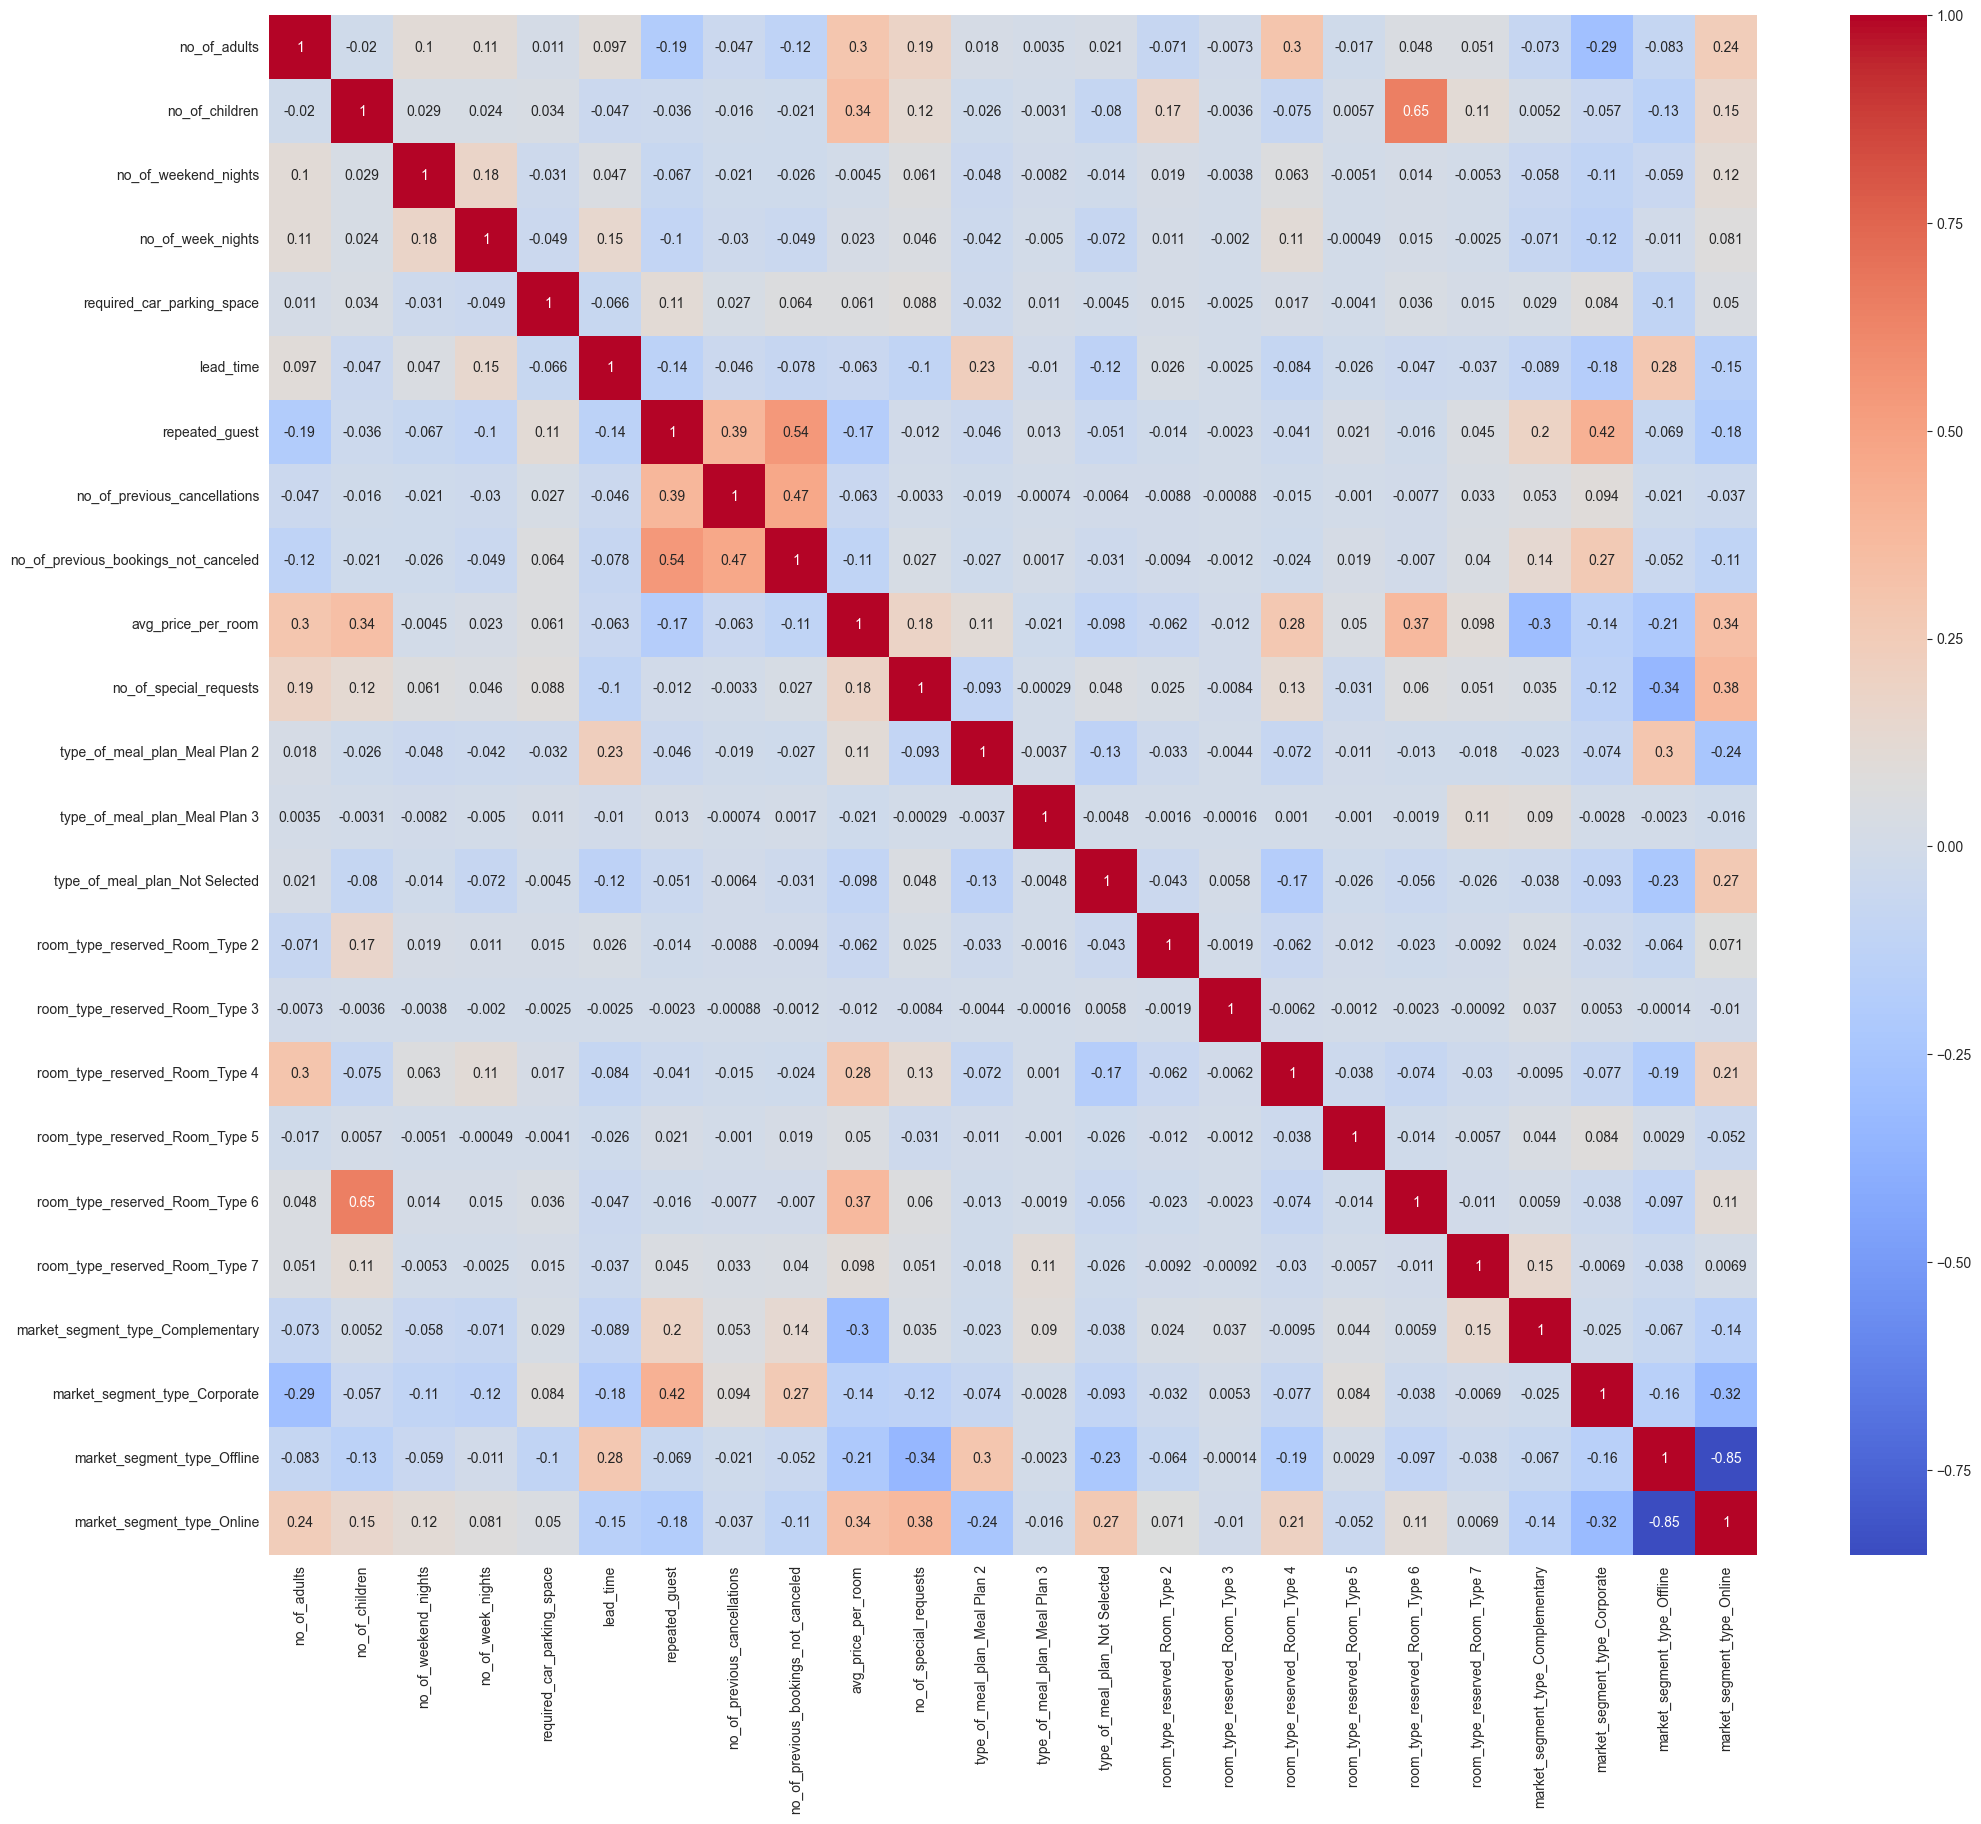

In [181]:
# # flot histogram of df of corr
# plt.figure(figsize=(24, 20))
# sns.heatmap(df.drop(['booking_status'], axis=1).corr(), annot=True, cmap='coolwarm')
# plt.show()

In [156]:
scaler = StandardScaler()

df[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(df[['lead_time', 'avg_price_per_room']])
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,1.614896,0,0,0,-1.095033,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,-0.933701,0,0,0,0.092806,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,-0.980250,0,0,0,-1.237528,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,1.463610,0,0,0,-0.097567,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,-0.433291,0,0,0,-0.254312,...,False,False,False,False,False,False,False,False,False,True


In [157]:
X = df.drop(['booking_status'], axis=1)
y = df['booking_status']

y = y.map({'Not_Canceled': 0, 'Canceled': 1})

In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

print("GaussianNB: ", nb_model.score(X_test, y_test))

lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(X_train, y_train)

print("LogisticRegression: ", lr_model.score(X_test, y_test))

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

print("DecisionTreeClassifier: ", dt_model.score(X_test, y_test))

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

print("RandomForestClassifier: ", rf_model.score(X_test, y_test))

svc_model = SVC()
svc_model.fit(X_train, y_train)

print("SVC: ", svc_model.score(X_test, y_test))

xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

print("XGBClassifier: ", xgb_model.score(X_test, y_test))

GaussianNB:  0.40647829083390763
LogisticRegression:  0.8017918676774638
DecisionTreeClassifier:  0.8683666436940042
RandomForestClassifier:  0.8886285320468642
SVC:  0.8242591316333563
XGBClassifier:  0.8860096485182632


In [165]:
# # calculate the count of predicted classes
# nb_pred = xgb_model.predict(X)
# pd.Series(nb_pred).value_counts()

0    25505
1    10770
Name: count, dtype: int64

In [159]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

nb_model = GaussianNB()
nb_cv_score = cross_val_score(nb_model, X, y, cv=kf, scoring="accuracy")
print("GaussianNB: ", nb_cv_score.mean())

lr_model = LogisticRegression(max_iter=5000)
lr_cv_score = cross_val_score(lr_model, X, y, cv=kf, scoring="accuracy")
print("LogisticRegression: ", lr_cv_score.mean())

dt_model = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_model, X, y, cv=kf, scoring="accuracy")
print("DecisionTreeClassifier: ", dt_cv_score.mean())

rf_model = RandomForestClassifier()
rf_cv_score = cross_val_score(rf_model, X, y, cv=kf, scoring="accuracy")
print("RandomForestClassifier: ", rf_cv_score.mean())

# svc_model = SVC()
# svc_cv_score = cross_val_score(svc_model, X, y, cv=kf, scoring="accuracy")
# print("SVC: ", svc_cv_score.mean())

xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_cv_score = cross_val_score(xgb_model, X, y, cv=kf, scoring="accuracy")
print("XGBClassifier: ", xgb_cv_score.mean())

GaussianNB:  0.4083802982591972
LogisticRegression:  0.8003580277649347
DecisionTreeClassifier:  0.8621637714081787
RandomForestClassifier:  0.8898687535508676
XGBClassifier:  0.879861895759751


In [160]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

nb_skf_score = cross_val_score(nb_model, X, y, cv=skf, scoring="accuracy")
print("GaussianNB: ", nb_skf_score.mean())

lr_skf_score = cross_val_score(lr_model, X, y, cv=kf, scoring="accuracy")
print("LogisticRegression: ", lr_skf_score.mean())

dt_skf_score = cross_val_score(dt_model, X, y, cv=kf, scoring="accuracy")
print("DecisionTreeClassifier: ", dt_skf_score.mean())

rf_skf_score = cross_val_score(rf_model, X, y, cv=kf, scoring="accuracy")
print("RandomForestClassifier: ", rf_skf_score.mean())

# svc_skf_score = cross_val_score(svc_model, X, y, cv=kf, scoring="accuracy")
# print("SVC: ", svc_skf_score.mean())

xgb_skf_score = cross_val_score(xgb_model, X, y, cv=kf, scoring="accuracy")
print("XGBClassifier: ", xgb_skf_score.mean())

GaussianNB:  0.4086007370301569
LogisticRegression:  0.8003580277649347
DecisionTreeClassifier:  0.8621362916068966
RandomForestClassifier:  0.889510376208815
XGBClassifier:  0.879861895759751


In [ ]:
model_params = {
    'naive_bayes': {
        'model': GaussianNB(),
        'params' : {
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, 15, 20]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, 15]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(max_iter=5000),
        'params' : {
            'C': [1, 5, 10]
        }
    },
    'svc': {
        'model': SVC(),
        'params' : {
            'C': [1, 5, 10],
            'kernel': ['rbf', 'linear']
        }
    },
    'xgboost': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'params' : {
            'n_estimators': [10, 50, 100],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
}

scores = []

for key, val in model_params.items():
    clf = GridSearchCV(
        val['model'],
        val['params'],
        cv=10,
        return_train_score=False
    )
    clf.fit(X, y)
    scores.append({
        'model': key,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })


df = pd.DataFrame(scores, columns=["model", "best_score", "best_params"])

In [ ]:
df

In [ ]:
# clf = GridSearchCV(
#     RandomForestClassifier(),
#     {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 15, 20]},
#     cv=10,
#     return_train_score=False,
# )
# clf.fit(X, y)
#
# clf.best_params_, clf.best_score_

In [ ]:
# clf = GridSearchCV(
#     XGBClassifier(eval_metric='mlogloss'),
#     {
#         'n_estimators': [10,50,100],
#         'learning_rate': [0.01, 0.1, 0.2]
#     },
#     cv=10,
#     return_train_score=False,
# )
# clf.fit(X, y)
#
# clf.best_params_, clf.best_score_